# Objetivo Principal:

* PCA: El objetivo principal de PCA es reducir la dimensionalidad de un conjunto de datos manteniendo la mayor cantidad posible de información (varianza). PCA busca transformar las variables originales en un conjunto de nuevas variables no correlacionadas llamadas componentes principales.
* Análisis Discriminante: El objetivo principal del Análisis Discriminante es encontrar una combinación lineal de características (variables) que maximice la separación entre las clases en un problema de clasificación. Es una técnica supervisada que se utiliza para reducir la dimensionalidad mientras se mantiene la información relevante para la clasificación.

# Supervisión:

* PCA: PCA es una técnica no supervisada, lo que significa que no tiene en cuenta las etiquetas de clase al realizar la reducción de dimensionalidad. Su enfoque se basa únicamente en la estructura de los datos.
* Análisis Discriminante: El Análisis Discriminante es una técnica supervisada, lo que significa que utiliza la información de las etiquetas de clase para determinar cómo reducir la dimensionalidad de manera que las clases sean más separables.

# Aplicación:

* PCA: Se utiliza comúnmente en tareas de reducción de dimensionalidad previas al análisis, como la visualización de datos de alta dimensión o la reducción del ruido en los datos.
* Análisis Discriminante: Se utiliza específicamente en problemas de clasificación para mejorar el rendimiento de los algoritmos de clasificación al proyectar los datos en un espacio de menor dimensión donde las clases sean más distinguibles.

# Resultados:

* PCA: Los resultados de PCA son las componentes principales, que son combinaciones lineales de las variables originales. Estas componentes no están necesariamente relacionadas con las clases en un problema de clasificación.
* Análisis Discriminante: Los resultados del Análisis Discriminante son las direcciones discriminantes o componentes discriminantes, que se seleccionan para maximizar la separación entre las clases. Estas direcciones están diseñadas específicamente para mejorar la clasificación.

# Problema: Clasificación de Glóbulos Rojos

##Contexto:

Un laboratorio médico ha recopilado datos sobre la morfología de glóbulos rojos a partir de análisis de sangre de pacientes. Estos datos pueden ser útiles para la detección temprana de ciertas enfermedades sanguíneas. Sin embargo, el conjunto de datos es bastante grande y complejo debido a la cantidad de características morfológicas medidas.

##Datos:

El laboratorio ha recopilado información sobre 500 pacientes, y para cada paciente, se midieron 20 características morfológicas de sus glóbulos rojos, como el tamaño, la forma y la textura. Además, se registró si el paciente tenía o no una enfermedad sanguínea.

## Objetivo:

El objetivo es desarrollar un sistema de clasificación que pueda identificar la presencia de una enfermedad sanguínea en función de las características morfológicas de los glóbulos rojos. Sin embargo, dado que el conjunto de datos es grande y altamente dimensional, se decide utilizar el Análisis de Componentes Principales (PCA) para reducir la dimensionalidad de los datos y, al mismo tiempo, conservar la mayor cantidad posible de información relevante.

## Preguntas a Resolver:

* ¿Cuántos componentes principales son necesarios para conservar al menos el 95% de la varianza total de los datos?
* ¿Cómo se comparan las características morfológicas más importantes (los componentes principales) con las características originales?
* ¿Se puede desarrollar un modelo de clasificación eficaz utilizando los componentes principales como características de entrada?
* ¿Cuál es la precisión del modelo de clasificación en la detección de enfermedades sanguíneas?

## Pasos Propuestos:

1. Cargar el conjunto de datos de glóbulos rojos de Scikit-Learn.
2. Aplicar PCA para reducir la dimensionalidad de los datos.
3. Determinar el número mínimo de componentes principales necesarios para conservar al menos el 95% de la varianza total.
4. Comparar las características originales con los componentes principales más importantes.
5. Dividir los datos en conjuntos de entrenamiento y prueba.
6. Entrenar un modelo de clasificación (por ejemplo, Regresión Logística) utilizando los componentes principales como características de entrada.
7. Evaluar la precisión del modelo en la detección de enfermedades sanguíneas.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos de glóbulos rojos de Scikit-Learn


In [2]:
data = load_digits()

In [3]:
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)

# Mostrar las primeras filas del DataFrame
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [5]:
df.columns

Index(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
       'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
       'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
       'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
       'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
       'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
       'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
       'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
       'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
       'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
       'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6',
       'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
       'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7'],
      dtype='object')

In [6]:
X = data.data
y = data.target

In [7]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características (importante antes de aplicar PCA)


In [9]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [11]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [12]:
X_train_std

array([[ 0.        , -0.34169755, -0.46336049, ...,  1.05270303,
         0.45952251, -0.19710003],
       [ 0.        , -0.34169755,  0.78471641, ..., -0.64451929,
        -0.50623083, -0.19710003],
       [ 0.        , -0.34169755, -1.08739895, ..., -0.13535259,
        -0.50623083, -0.19710003],
       ...,
       [ 0.        , -0.34169755,  0.78471641, ...,  1.56186972,
        -0.02335416, -0.19710003],
       [ 0.        , -0.34169755, -0.87938613, ..., -1.15368598,
        -0.50623083, -0.19710003],
       [ 0.        , -0.34169755, -0.87938613, ..., -0.98396375,
        -0.50623083, -0.19710003]])

In [23]:
X_train_std.shape

(1437, 64)

# Aplicar PCA para reducir la dimensionalidad (ajustar el número de componentes según sea necesario)


In [13]:
pca = PCA(n_components=0.95)
pca

PCA(n_components=0.95)

In [14]:
X_train_pca = pca.fit_transform(X_train_std)
X_train_pca

array([[ 0.89165303, -4.74167035,  0.29068891, ..., -1.03883957,
         0.91946324, -0.12681243],
       [ 1.18767679, -1.85080876,  3.79579877, ..., -0.17678777,
        -0.65187934, -0.23678416],
       [ 3.33677132, -1.90074688,  1.95577585, ..., -0.44722351,
         0.32161774, -0.10340391],
       ...,
       [-1.63986295,  2.2971521 , -0.47282308, ...,  0.20954296,
        -1.1861047 , -0.81918248],
       [ 1.68953873,  1.84506575, -0.30431055, ...,  0.56746727,
        -0.37471656, -0.38389372],
       [ 0.33256107, -0.34391184, -4.46957369, ...,  0.0070439 ,
        -0.08404005, -0.16737481]])

In [15]:
pca = PCA(n_components=0.95)  # Conservar el 95% de la varianza
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Entrenar un modelo de clasificación (por ejemplo, Regresión Logística) en los componentes principales

In [16]:
classifier = LogisticRegression(max_iter=1000, random_state=42)
classifier.fit(X_train_pca, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [17]:
y_pred = classifier.predict(X_test_pca)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", accuracy)

Exactitud del modelo: 0.9611111111111111


In [19]:
loadings = pca.components_

In [20]:
loadings

array([[ 6.04585129e-19, -1.90648929e-01, -2.86663391e-01, ...,
        -9.89459917e-02, -1.25825270e-01, -7.35399058e-02],
       [-3.97645815e-18,  4.04997728e-02,  5.46116590e-02, ...,
        -2.30515358e-01, -1.58286985e-01, -6.81966315e-02],
       [ 2.77126742e-19, -1.42169197e-02,  6.70897715e-02, ...,
         2.79734163e-02, -8.88997519e-02, -8.31389124e-02],
       ...,
       [-1.78109297e-17, -1.86665654e-02,  8.13930308e-02, ...,
        -1.94044007e-01, -7.63641039e-02,  3.05594471e-02],
       [ 1.66080205e-17,  5.33636973e-02, -1.94086037e-01, ...,
        -1.34870573e-02,  9.30083664e-02,  7.92025527e-02],
       [-2.40862768e-18, -9.76766528e-02,  1.32733905e-02, ...,
        -5.25598363e-02,  1.77981965e-01, -1.35906449e-02]])

In [21]:
loading_1 = loadings[1]
loading_1

array([-3.97645815e-18,  4.04997728e-02,  5.46116590e-02, -2.73593013e-02,
        1.51665047e-01,  2.75217255e-01,  2.48764537e-01,  1.50877607e-01,
       -4.05671159e-03,  1.76434474e-02,  1.04661000e-02, -1.05768912e-01,
        5.16693820e-02,  2.21769128e-01,  2.67930613e-01,  1.39991465e-01,
       -9.81001944e-03, -3.03143282e-02, -1.23553660e-01, -8.80614077e-02,
        8.00341139e-02,  1.72279447e-01,  1.51489340e-01,  8.91180542e-02,
       -6.66844813e-03, -7.87471758e-02, -1.23164694e-01,  4.75349185e-02,
        1.68809774e-01,  1.50954710e-01,  5.87291953e-02,  2.19437017e-02,
        0.00000000e+00, -1.31185007e-01, -1.21330936e-01,  4.43480683e-02,
        1.06932932e-01,  7.87310243e-03, -7.08002954e-02,  0.00000000e+00,
       -2.58406300e-02, -1.11248488e-01, -1.95464070e-01, -8.16486579e-03,
        1.35993035e-01, -8.17504996e-02, -2.24762825e-01, -8.34403561e-02,
       -1.19313353e-02, -3.57467881e-02, -1.86068626e-01, -5.71781904e-02,
        4.67100210e-02, -

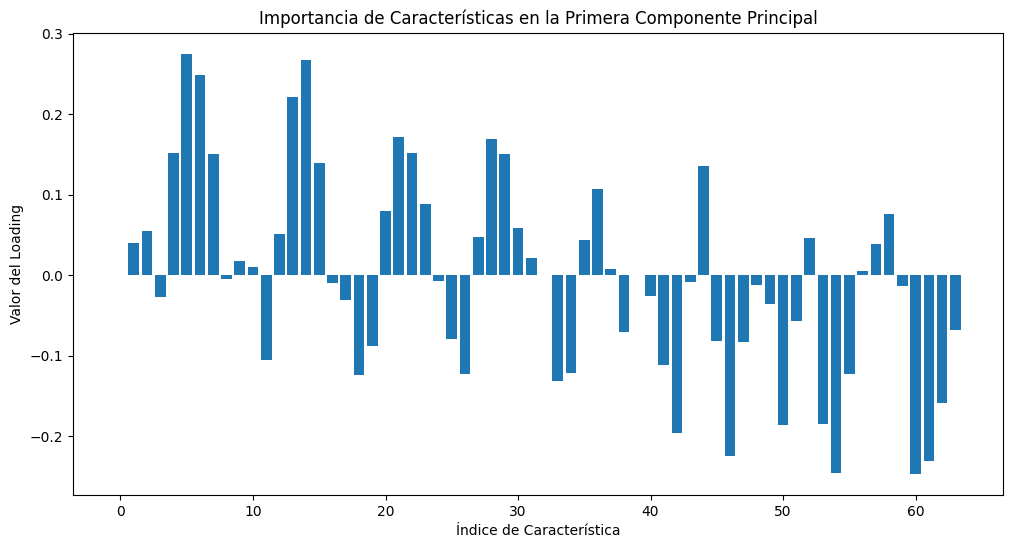

In [22]:
import matplotlib.pyplot as plt

# Obtener los loadings de la primera componente principal
loading_1 = loadings[1]

# Crear un gráfico de barras para mostrar los loadings de la primera componente principal
plt.figure(figsize=(12, 6))
plt.bar(range(len(loading_1)), loading_1)
plt.xlabel('Índice de Característica')
plt.ylabel('Valor del Loading')
plt.title('Importancia de Características en la Primera Componente Principal')
plt.show()

In [24]:
# Obtener la varianza explicada por las dos primeras componentes principales
varianza_explicada = pca.explained_variance_ratio_[:10]

# Calcular el porcentaje de varianza explicada
porcentaje_varianza_explicada = sum(varianza_explicada) * 100

print(f"Porcentaje de varianza explicada por las dos primeras componentes principales: {porcentaje_varianza_explicada:.2f}%")

Porcentaje de varianza explicada por las dos primeras componentes principales: 59.23%


<ipython-input-25-625e4a062a92>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_test_pca[:, 2], X_test_pca[:, 4], c=y_pred, cmap=plt.cm.get_cmap('viridis', 10))


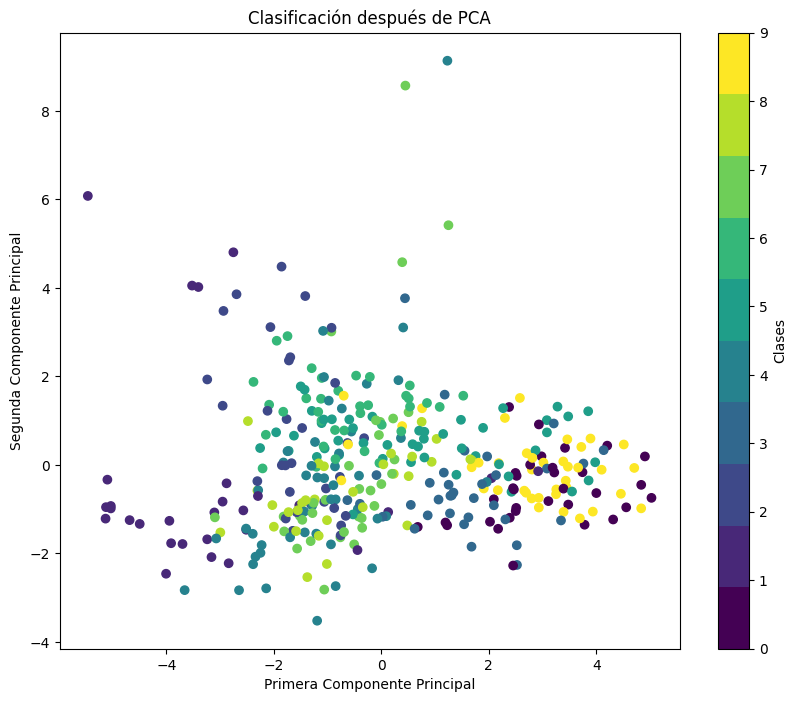

In [25]:
plt.figure(figsize=(10, 8))
plt.scatter(X_test_pca[:, 2], X_test_pca[:, 4], c=y_pred, cmap=plt.cm.get_cmap('viridis', 10))
plt.colorbar(label='Clases')
plt.title('Clasificación después de PCA')
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.show()

In [27]:
loadings[1]

array([-3.97645815e-18,  4.04997728e-02,  5.46116590e-02, -2.73593013e-02,
        1.51665047e-01,  2.75217255e-01,  2.48764537e-01,  1.50877607e-01,
       -4.05671159e-03,  1.76434474e-02,  1.04661000e-02, -1.05768912e-01,
        5.16693820e-02,  2.21769128e-01,  2.67930613e-01,  1.39991465e-01,
       -9.81001944e-03, -3.03143282e-02, -1.23553660e-01, -8.80614077e-02,
        8.00341139e-02,  1.72279447e-01,  1.51489340e-01,  8.91180542e-02,
       -6.66844813e-03, -7.87471758e-02, -1.23164694e-01,  4.75349185e-02,
        1.68809774e-01,  1.50954710e-01,  5.87291953e-02,  2.19437017e-02,
        0.00000000e+00, -1.31185007e-01, -1.21330936e-01,  4.43480683e-02,
        1.06932932e-01,  7.87310243e-03, -7.08002954e-02,  0.00000000e+00,
       -2.58406300e-02, -1.11248488e-01, -1.95464070e-01, -8.16486579e-03,
        1.35993035e-01, -8.17504996e-02, -2.24762825e-01, -8.34403561e-02,
       -1.19313353e-02, -3.57467881e-02, -1.86068626e-01, -5.71781904e-02,
        4.67100210e-02, -